## Fandango Rating Analysis ##

For this project I aim to analyze Fandango ratings to see if they have a systemic over-bias, due to rounding issues. We'll be utilizing a variety of statistical techniques in Python to accomplish this, as well as comparing a version of ratings obtained from movies in 2015 before data journalist [Walter Hickey](https://fivethirtyeight.com/features/fandango-movies-ratings/) did an analysis showing inflated ratings for movies. 

* To recap, we'll be using statistics in Python
* We'll compare three datasets, movie ratings from 2015 (before Walter's analysis) and 2016/2017 movie rating datasets (after analysis)

In [57]:
import pandas as pd
%matplotlib inline
fd = pd.read_csv("fandango_score_comparison.csv")
mr = pd.read_csv("movie_ratings_16_17.csv")



In [58]:
fd.head(2)
print(fd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [59]:
mr.head(2)
print(mr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None


In [60]:
fd_cols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']

In [61]:
mr_cols = ['movie', 'year', 'fandango']

In [62]:
fd_before = fd[fd_cols]
fd_after = mr[mr_cols]

In [63]:
fd_before.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [64]:
fd_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


## Population of Interest - Movies in both datasets ##

* Note we want to be able to investigate our movie population to see if we can find a broader trend on movie ratings in general on Fandango compared to before & after the analysis (i.e. apply results to the general population).

However

* Movies in the original dataset were only included if they had a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.
* Movies in the 2016 & 2017 dataset contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

Due to the above, the movies were **not randomly selected** and did not use the same methodology to determine those included in the dataset, so it would not be representative of our population(s) of interest.
 
Due to this limitation, we'll have to change our goal slightly so we only care about analyzing ratings for Fandango's population of population movies of 2015, and then 2016/2017, rather than the general population. While not ideal this is an okay proxy given our data limitations.

In [65]:
fd_before_check = fd['Fandango_votes'] >= 30

In [66]:
fd_before_check.value_counts()

True    146
Name: Fandango_votes, dtype: int64

In [67]:
# Note, the 2016 / 2017 movies doesn't count the 
# number of fan votes, we'll have to test a random sample ourselves

fd_after.sample(10, random_state = 1)



,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


The fan ratiings of these movies are:
* Mechanic: Resurrection - ~2,200+
* Warcraft - ~ 7,200+
* Max Steel	- ~400+
* Me Before You	- ~5200+
* Fantastic Beasts and Where to Find Them - ~13,000+
* Cell - 17
* Genius - ~100+
* Sully	- 11,800+
* A Hologram for the King - 500
* Captain America: Civil War - ~35,000+

We can be reasonably confident then, that the movie set after ratings are representative of popular movies, as 90% in our random sample well exceed our 30 vote criteria from the previous dataset

In [68]:
# Note that not every movie was released in 2015 or 2016, 
# we need to extract the years from the title to remove 
# movies outside of the applicable ranges

fd_before['Year'] = fd_before['FILM'].str[-5:-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
fd_2015 = fd_before[fd_before['Year'] == '2015']

In [70]:
fd_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [71]:
fd_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [72]:
fd_2016 = fd_after[fd_after['year'] == 2016]

In [73]:
fd_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
FILM                    129 non-null object
Fandango_Stars          129 non-null float64
Fandango_Ratingvalue    129 non-null float64
Fandango_votes          129 non-null int64
Fandango_Difference     129 non-null float64
Year                    129 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 7.1+ KB


In [74]:
fd_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
movie       191 non-null object
year        191 non-null int64
fandango    191 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


TypeError: 'str' object is not callable

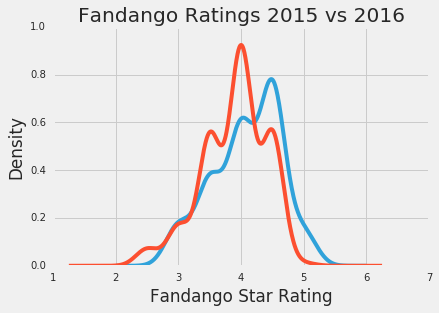

In [77]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fd_2015['Fandango_Stars'].plot.kde(label = "2015")
fd_2016['fandango'].plot.kde(label = "2016")

plt.title('Fandango Ratings 2015 vs 2016')
plt.xlabel('Fandango Star Rating')
plt.ylabel('Density of Fan Ratings')
plt.legend()
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

## Results ## 

We can see based on the above a few things:
* The ratings are both skewed left, with 2015 having a larger skew than 2016. The majority of 2015 ratings are 4.5, where the majority of 2016 ratings are 4.0.
* It's interesting to see there are no ratings below a 2.5 in 2015, but there are some between 2.0 - 2.5 in 2016.
* There is a distinct appearance that it appears most of the ratings were "normalized" and no longer rounded up which reduced the skewness of their movie ratings.
* It appears the average movie rated dropped in 2016 when compared to 2015 (from 4.5 in 2015 to 4.0)





In [78]:
fd_2015['Fandango_Stars'].value_counts()


4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [79]:
fd_2016['fandango'].value_counts()

4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

In [80]:
# Lets compare the two tables based on proportionality

fd_2015['Fandango_Stars'].value_counts(normalize = True)


4.5    0.379845
4.0    0.286822
3.5    0.178295
3.0    0.085271
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [81]:
fd_2016['fandango'].value_counts(normalize = True)

4.0    0.403141
4.5    0.246073
3.5    0.240838
3.0    0.073298
2.5    0.031414
5.0    0.005236
Name: fandango, dtype: float64

## Results based on a normalized frequency distribution ## 

* Based on the results above, it's clear that there was a difference,in 2015, ~38% of movies are 4.5 starts, and 6% of movies are 5 starts, where in 2016, only ~25% are 4.5 stars and 0.5% are 5 stars

In [82]:
mean_2015 = fd_2015['Fandango_Stars'].mean()
mean_2016 = fd_2016['fandango'].mean()
median_2015 = fd_2015['Fandango_Stars'].median()
median_2016 = fd_2016['fandango'].median()
mode_2015 = fd_2015['Fandango_Stars'].mode()[0]
mode_2016 = fd_2016['fandango'].mode()[0]


In [83]:
from prettytable import PrettyTable

fd_table = PrettyTable()

fd_table.field_names = ["Year", "Mean", "Median", "Mode"]

fd_table.add_row(["2015", mean_2015, median_2015, mode_2015])
fd_table.add_row(["2016", mean_2016, median_2016, mode_2016])

print(fd_table)


+------+--------------------+--------+------+
| Year |        Mean        | Median | Mode |
+------+--------------------+--------+------+
| 2015 | 4.0852713178294575 |  4.0   | 4.5  |
| 2016 | 3.887434554973822  |  4.0   | 4.0  |
+------+--------------------+--------+------+


TypeError: 'str' object is not callable

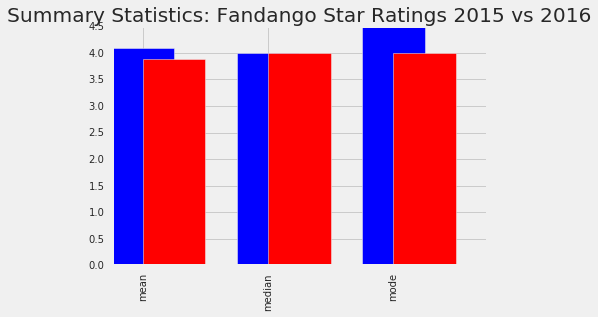

In [84]:
fd_data = pd.DataFrame()
all_2015 = [mean_2015, median_2015, mode_2015]
all_2016 = [mean_2016, median_2016, mode_2016]
fd_data['2015'] = all_2015
fd_data['2016'] = all_2016
fd_data.index = ['mean', 'median', 'mode']

fd_data

fd_data['2015'].plot.bar(color = 'blue', align = 'center', label = '2015')
fd_data['2016'].plot.bar(color = 'red', align = 'edge', label = '2016')
plt.title('Summary Statistics: Fandango Star Ratings 2015 vs 2016')
plt.ylabel('Star Rating')
plt.xlabel('Summary Statistics')

## Results ## 
* As we can see, movie ratings in 2016 are rating lower than movie ratings in 2015
* It appears Fandango may have stopped rounding up their values to the nearest whole integer, which may have reduced the bias in their ratings.